In [1]:
from scipy.integrate import solve_ivp

import numpy as np

import matplotlib.pyplot as plt
import matplotlib

## Solve the ODE

In [2]:
def f(t, U, sigma, r, b):
    x = U[0]
    y = U[1]
    z = U[2]

    x_prime = sigma * (y - x)
    y_prime = r * x - y - x * z
    z_prime = x * y - b * z

    U_prime = np.array([x_prime, y_prime, z_prime])
    return U_prime

In [3]:
sigma = 10
b = 8 / 3
r_list = np.array([0.9, 12, 22, 28])

solution = []

initCond = np.array([0, 1, 0])



for r in r_list:
    sol = solve_ivp(f, [0, 100], initCond, method = 'LSODA', args=(sigma, r, b,))
    solution.append(sol)

In [4]:
x, y, z, t = [], [], [], []

for i in range(len(r_list)):
    x.append(solution[i].y[0,:])
    y.append(solution[i].y[1,:])
    z.append(solution[i].y[2,:])

    t.append(solution[i].t)

In [5]:
params = {
    'figure.figsize'    : [11,5],
#    'text.usetex'       : True,
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
}
matplotlib.rcParams.update(params)

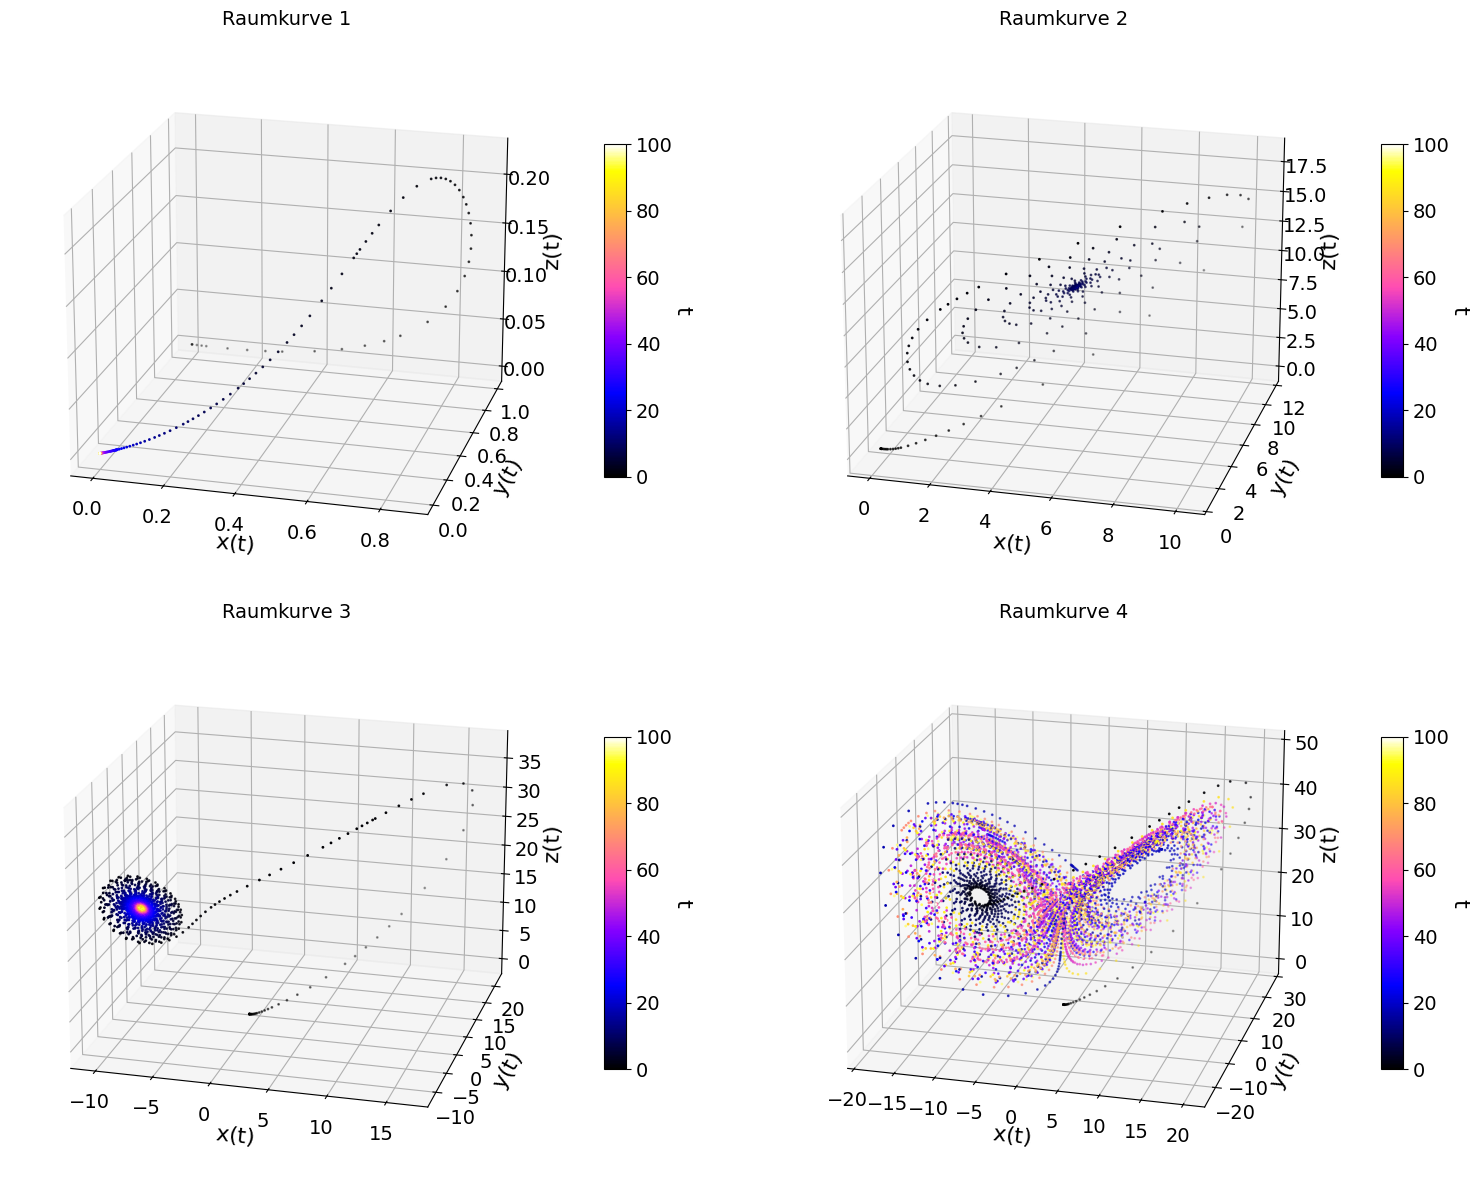

In [6]:
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D  # required for 3D plots

# Example assumption: x, y, z, t are lists of 4 arrays each
# x = [x0, x1, x2, x3], and each x0, x1, ... is a 1D array
# Similarly for y, z, t

fig = plt.figure(figsize=(16, 12))  # Taller figure for 2x2 grid

for i in range(4):  # Assuming r_list has length 4
    ax = fig.add_subplot(2, 2, i + 1, projection='3d')  # 2x2 subplot grid

    # scatter3D requires a color array (e.g., time values) for cmap to work
    bild = ax.scatter3D(
        x[i], y[i], z[i],
        c=t[i],  # coloring by time or another scalar
        marker='o', s=1,
        cmap=matplotlib.cm.gnuplot2
    )

    ax.view_init(azim=-75, elev=20)
    cbar = fig.colorbar(bild, ax=ax, shrink=0.6, aspect=15)
    cbar.set_label(r"$\rm t$", rotation=270, labelpad=15)
    ax.set_title(f"Raumkurve {i+1}")
    ax.set_xlabel(r"$\rm x(t)$")
    ax.set_ylabel(r"$\rm y(t)$")
    ax.set_zlabel(r"$\rm z(t)$")

plt.tight_layout()
plt.show()
